<a href="https://colab.research.google.com/github/wanwanliang/ML_Practices/blob/main/EnsembleLearning_and_RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
assert sys.version_info >= (3,5)
import sklearn
assert sklearn.__version__ >= '0.20'
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Coin Tosses

In [ ]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

In [ ]:
heads_proba = 0.51
coin_tosses = (np.random.rand(100000,10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0)/np.arange(1, 100001).reshape(-1,1)

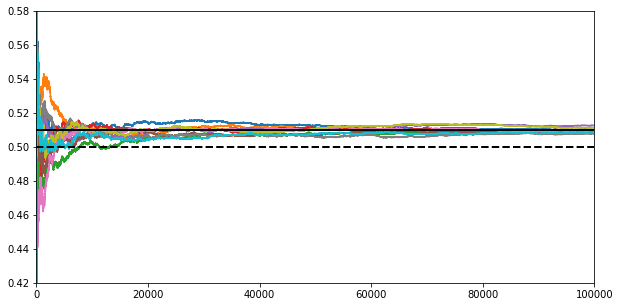

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_heads_ratio)
plt.axis([0, 100000, 0.42, 0.58])
plt.plot([0,100000],[0.5, 0.5], 'k--', linewidth=2, label='50%')
plt.plot([0,100000],[0.51,0.51], 'k-', linewidth=2, label="51%" )
plt.show()

## Machine Learning and Majority Voting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import VotingClassifier as vc
from sklearn.linear_model import LogisticRegression as lrc
from sklearn.svm import SVC as svc

In [ ]:
lr_clf = lrc(solver='lbfgs', random_state=42)
rf_clf = rfc(n_estimators=250, random_state=42) 
svm_clf = svc(gamma='scale', random_state=42)
vc_clf = vc(estimators=[('lr', lr_clf),('rf', rf_clf),('svc', svm_clf)], voting='hard')

In [ ]:
lr_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)
vc_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                               

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (lr_clf, rf_clf, svm_clf):
  y_pred = clf.predict(x_test)
  ac = accuracy_score(y_test, y_pred)
  print(clf.__class__.__name__, ac)

LogisticRegression 0.864
RandomForestClassifier 0.904
SVC 0.896


### Hard voting

In [ ]:
lr_clf = lrc(solver='lbfgs', random_state=42)
rf_clf = rfc(n_estimators=100, random_state=42) 
svm_clf = svc(gamma='scale', random_state=42)
vc_clf = vc(estimators=[('lr', lr_clf),('rf', rf_clf),('svc', svm_clf)], voting='hard')

vc_clf.fit(x_train, y_train)
y_pred = vc_clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(vc_clf.__class__.__name__, ac)

VotingClassifier 0.912


### Soft voting

In [ ]:
lr_clf = lrc(solver='lbfgs', random_state=42)
rf_clf = rfc(n_estimators=100, random_state=42) 
svm_clf = svc(gamma='scale',probability=True ,random_state=42)
vc_clf = vc(estimators=[('lr', lr_clf),('rf', rf_clf),('svc', svm_clf)], voting='soft')

vc_clf.fit(x_train, y_train)
y_pred = vc_clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(vc_clf.__class__.__name__, ac)

VotingClassifier 0.92


## Bagging ensembles

In [ ]:
from sklearn.ensemble import BaggingClassifier as bc
from sklearn.tree import DecisionTreeClassifier as dtc

bag_clf = bc(
    dtc(random_state=42), n_estimators=500, max_samples=100, bootstrap=True, random_state=42
)

bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(bag_clf.__class__.__name__,ac)

dtc_clf = dtc(random_state=42)
dtc_clf.fit(x_train, y_train)
y_pred = dtc_clf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print(dtc_clf.__class__.__name__,ac)

BaggingClassifier 0.904
DecisionTreeClassifier 0.856


In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, x, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

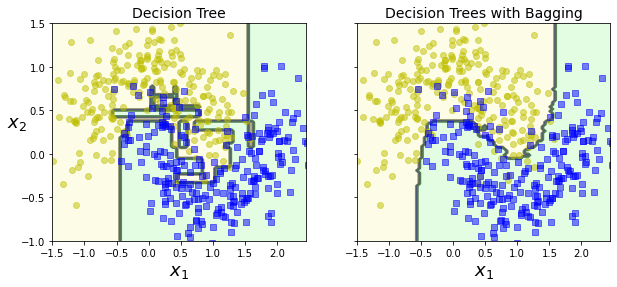

In [ ]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(dtc_clf, x, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, x, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
plt.show()

## Random Forests

In [ ]:
bag_clf = bc(
    dtc(splitter='random', max_leaf_nodes=16, random_state=42),
    n_estimators = 500, max_samples=0.95, bootstrap = True, random_state=42
)

In [ ]:
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_pred,y_test)

0.904

In [ ]:
rf_clf = rfc(n_estimators=500, max_leaf_nodes=16, random_state=42)
rf_clf.fit(x_train, y_train)
y_pred_rf = rf_clf.predict(x_test)
accuracy_score(y_pred_rf, y_test)

0.912

In [ ]:
np.sum(y_pred == y_pred_rf)/ len(y_pred)

0.976

In [ ]:
accuracy_score(y_pred, y_pred_rf)

0.976

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

rf_clf = rfc(n_estimators=500, random_state=42)
rf_clf.fit(iris['data'], iris['target'])

for name, score in zip(iris['feature_names'], rf_clf.feature_importances_):
  print(name,'score: ' ,round(score, 3))

sepal length (cm) score:  0.112
sepal width (cm) score:  0.023
petal length (cm) score:  0.441
petal width (cm) score:  0.423


In [ ]:
print(iris['feature_names'])
print(rf_clf.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0.11249225 0.02311929 0.44103046 0.423358  ]


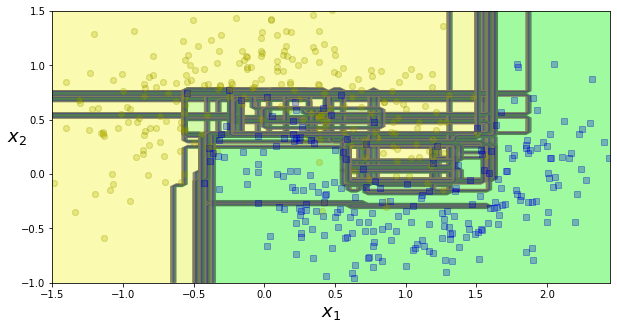

In [ ]:
plt.figure(figsize=(10,5))

for i in range(15):
  tree_clf = dtc(max_leaf_nodes=16, random_state=42+i)
  indices_with_replacement = np.random.randint(0, len(x_train), len(x_train))

  tree_clf.fit(x[indices_with_replacement], y[indices_with_replacement])
  plot_decision_boundary(tree_clf, x, y, axes=[-1.5, 2.45, -1, 1.5],alpha=0.02)
plt.show()

### Out of Bag Evaluation

In [ ]:
bag_clf = bc(
    
    dtc(random_state=42), n_estimators=500, bootstrap=True, oob_score=True, random_state=40
)

bag_clf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [ ]:
y_trPred = bag_clf.predict(x_train)
actr = accuracy_score(y_train, y_trPred)
y_tsPred = bag_clf.predict(x_test)
acts = accuracy_score(y_test, y_tsPred)
print("OOB Accuracy: {}".format(round(bag_clf.oob_score_, 3)))
print('Train Accuracy: {}'.format(round(actr,3)))
print('Test Accuracy: {}'.format(round(acts, 3)))

OOB Accuracy: 0.901
Train Accuracy: 1.0
Test Accuracy: 0.912
